In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [3]:
# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [41]:
# Import data
df_train = pd.read_csv('Documents/data/train_v2.csv')
df_test = pd.read_csv('Documents/data/test_v2.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (135,204,274,417) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (417) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
# Store target variable of training data in a safe place
loss_train_ = df_train.loss
loss_test_ = pd.read_csv('Documents/data/sampleSubmission.csv')

In [43]:
# 合并target
loss_train=pd.DataFrame(loss_train_)
loss_test=loss_test_.drop(columns=['id'])
target = pd.concat([loss_train,loss_test])
print(target.shape)
type(target)

(316415, 1)


pandas.core.frame.DataFrame

In [44]:
#合并train and test

data = pd.concat([df_train.drop(['loss'], axis=1), df_test])
#删掉 'id'列
df_data = data.drop(columns=['id'])
#查看
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316415 entries, 0 to 210943
Columns: 769 entries, f1 to f778
dtypes: float64(655), int64(95), object(19)
memory usage: 1.8+ GB


In [45]:
# View head of 'Name' column
df_data.tail()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778
210939,140,9,0.802220,3600,10.0,9836,831.0,491.0,128.28,138.80,...,-12.54,3,6.22,-4.55,7.01,0.2130,-0.7890,0,1,13
210940,154,9,0.477440,3600,3.0,80502,4283.0,280.0,154.13,153.84,...,-9.64,20,5.98,-4.13,3.02,0.2582,0.4792,1,1,41
210941,150,8,0.480407,4400,7.0,14507,78.0,1502.0,150.75,150.20,...,-1.12,4,0.41,-0.16,0.08,0.1552,0.8375,1,1,20
210942,135,8,0.223248,2700,16.0,13700,9572.0,5151.0,131.42,134.49,...,-29.81,51,20.39,-15.14,11.75,0.2411,0.7004,0,0,513
210943,166,7,0.870420,5300,4.0,81409,1584.0,2823.0,161.68,164.88,...,-7.02,10,5.83,-4.96,4.30,0.3003,1.1379,0,1,1212


# 1. representing data

## 1.1 deal with NAN

In [ ]:
#用均值替代df_data中的NA
import math
df_data_ = df_data.replace('NA',math.nan)
X = df_data_.fillna(df_data_.mean())

In [8]:
#保存数据集
#df_data.info()
df_data.to_csv('~/Documents/data/df_data.csv')
target.to_csv('~/Documents/data/loss.csv')

In [11]:
#合并df_data和target
dataset = pd.concat([df_data, target], axis=1)
dataset.info()
dataset.to_csv('~/Documents/data/dataset.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316415 entries, 0 to 210943
Columns: 770 entries, f1 to loss
dtypes: float64(655), int64(96), object(19)
memory usage: 1.8+ GB


In [13]:
data_final = dataset.sample( n = 5000, replace=False, weights=None, random_state=1, axis=None)

In [14]:
data_final.shape

(5000, 770)

In [15]:
type(data_final)

pandas.core.frame.DataFrame

In [16]:
#保存数据
data_final.to_csv('~/Documents/data/sample.csv')

In [5]:
data_final = pd.read_csv('~/Documents/data/sample.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (274,417) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
X = data_final.drop(columns=['loss'])
y_ = data_final['loss']

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 770 entries, Unnamed: 0 to f778
dtypes: float64(657), int64(96), object(17)
memory usage: 29.4+ MB


In [8]:
#把loss函数转变为标签
def toLabels(d):
    i = 0
    while i< len(d):
        if d[i] != 0:
            d[i] = 1
        else:
            d[i] = 0
        i+=1
    return d

## 1.2 deal with categorical variables

In [9]:
y = list(y_)

In [10]:
toLabels(y)

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [11]:
#把list格式转变为series
y = pd.Series(y)
type(y)

pandas.core.series.Series

## 1.3 descriptive analysis



In [ ]:
import numpy as np
import pandas as pd

#df_train = pd.read_csv('../input/train.csv')

target_count = y.value_counts()

print('Class 0:', class0)
print('Class 1:', class1)
print('Proportion:', round(class0 / class1, 2), ': 1')

target_count.plot(kind='bar', title='Count (y)')

数据集明显不平衡，违约用户：信用良好用户比例为 1:36

#

#

In [12]:
#发现X中数据类型有19个特征是obeject,把object数据类型转变成float
z = X.astype({'f137':float,'f138':float,'f206':float,'f207':float,'f276':float,'f277':float,'f338':float,'f390':float,'f391':float,'f419':float,'f420':float,'f469':float,'f472':float,'f534':float,'f537':float,'f626':float,'f627':float,'f695':float,'f698':float}, copy=True, errors='raise')

In [13]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 770 entries, Unnamed: 0 to f778
dtypes: float64(674), int64(96)
memory usage: 29.4 MB


     ##cross-validation and no feature engineering:

## 1.4 use confusion matrix to verify the unbalanced dataset

In [136]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



X_train, X_test, y_train, y_test = train_test_split(z, y, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.60%


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#Confusion matrix

Confusion matrix:
 [[966   0]
 [ 34   0]]


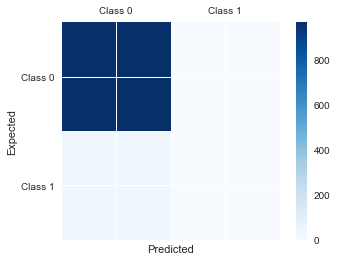

In [125]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

###  simple introduction to Resampling

### 重采样

In [14]:
#把dataframe的row number变一下，以便方便合并z and y然后进行重采样
z_ = z.reset_index()
df_train = pd.concat([z_, y],axis=1)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 772 entries, index to 0
dtypes: float64(674), int64(98)
memory usage: 29.4 MB


In [16]:
#把 df_train的最后一列“0”rename 为target

df_data=df_train.rename({0:'target'},axis=1)
df_data.info()
df_data.to_csv('Documents/data/df_data_clean_5000_771')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 772 entries, index to target
dtypes: float64(674), int64(98)
memory usage: 29.4 MB


###

###

In [18]:
df_data_ = pd.read_csv('Documents/data/df_data_clean_5000_771')
df_data_.info()
df_data_.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 773 entries, Unnamed: 0 to target
dtypes: float64(674), int64(99)
memory usage: 29.5 MB


,Unnamed: 0,index,Unnamed: 0.1,f1,f2,f3,f4,f5,f6,f7,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,target
4995,4995,4995,200626,124,10,0.490002,1800,16.0,13203,587.0,...,11,3.52,-2.37,1.65,0.2522,0.8809,0,0,394,0
4996,4996,4996,26514,137,8,0.124547,1500,4.0,80537,1489.0,...,34,11.72,-9.03,7.31,0.3101,0.4170,0,0,107,0
4997,4997,4997,108002,132,9,0.138820,1300,15.0,14522,8136.0,...,4,1.76,-1.32,1.05,0.1918,-0.8204,0,0,394,0
4998,4998,4998,41666,134,6,0.637717,1800,4.0,1078,5738.0,...,26,12.03,-9.44,7.61,0.2478,0.8001,0,0,2,0
4999,4999,4999,132232,148,8,0.608755,2200,4.0,8417,1723.0,...,13,5.76,-0.88,5.67,0.2377,0.3928,0,0,107,0


In [19]:
#清楚数据集中的两列
df_data = df_data_.drop(columns=['Unnamed: 0','index'])
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 771 entries, Unnamed: 0.1 to target
dtypes: float64(674), int64(97)
memory usage: 29.4 MB


In [20]:
df_data.tail()

,Unnamed: 0.1,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,target
4995,200626,124,10,0.490002,1800,16.0,13203,587.0,1363.0,129.54,...,11,3.52,-2.37,1.65,0.2522,0.8809,0,0,394,0
4996,26514,137,8,0.124547,1500,4.0,80537,1489.0,26.0,134.05,...,34,11.72,-9.03,7.31,0.3101,0.4170,0,0,107,0
4997,108002,132,9,0.138820,1300,15.0,14522,8136.0,3681.0,129.32,...,4,1.76,-1.32,1.05,0.1918,-0.8204,0,0,394,0
4998,41666,134,6,0.637717,1800,4.0,1078,5738.0,2337.0,129.92,...,26,12.03,-9.44,7.61,0.2478,0.8001,0,0,2,0
4999,132232,148,8,0.608755,2200,4.0,8417,1723.0,4808.0,131.41,...,13,5.76,-0.88,5.67,0.2377,0.3928,0,0,107,0


In [21]:
# Class count
count_class_0, count_class_1 = df_data.target.value_counts()

# Divide by class
df_class_0 = df_data[df_data['target'] == 0]
df_class_1 = df_data[df_data['target'] == 1]

### Random under-sampling

Random under-sampling:
1    153
0    153
Name: target, dtype: int64


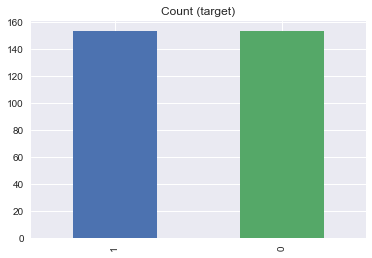

In [22]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)


print('Random under-sampling:')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count (target)');

下采样导致丢失较多的信息


### Random over-sampling
    

Random over-sampling:
1    4847
0    4847
Name: target, dtype: int64


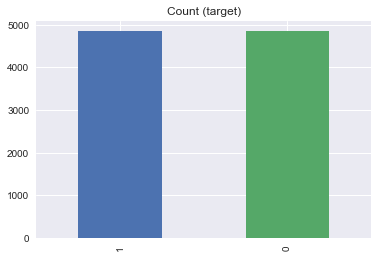

In [23]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar', title='Count (target)')

过采样容易导致过拟合

In [24]:
df_X = df_data.drop(columns=['target'])
df_y = df_data['target']
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 770 entries, Unnamed: 0.1 to f778
dtypes: float64(674), int64(96)
memory usage: 29.4 MB


In [25]:
#填补X的缺失值
X = df_X.fillna(df_X.mean())

In [26]:
np.all(np.isfinite(X))

True

In [27]:
type(df_y)

pandas.core.series.Series

In [28]:
type(X)

pandas.core.frame.DataFrame

In [29]:
np.any(np.isnan(X))

False

In [30]:
#把数据归一化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [31]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (5000, 770)
Reduced shape: (5000, 2)


Text(0,0.5,'Second principal component')

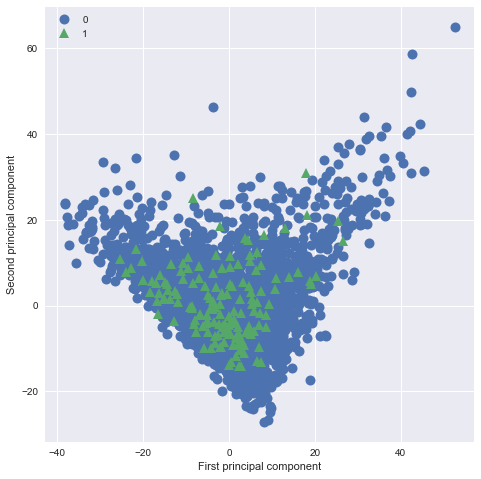

In [17]:
import mglearn
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], df_y)
plt.legend(['0','1'], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

'''



# 2. Over-sampling followed by under-sampling


 
 '''

In [32]:
import matplotlib


import matplotlib.pyplot as plt



import imblearn
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, df_y)
print("X_smt shape:{}".format(X_smt.shape))
print("y_smt shape:{}".format(y_smt.shape))

X_smt shape:(8898, 770)
y_smt shape:(8898,)


In [33]:
#把数据格式转变为series
y_smt = pd.Series(data= y_smt)


Class 0: 4484
Class 1: 4484
Proportion: 1.0 : 1


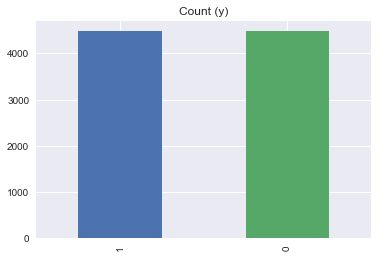

In [22]:
import numpy as np
import pandas as pd

#df_train = pd.read_csv('../input/train.csv')

target_count = y_smt.value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (y)')





In [34]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_smt)

# transform data onto the first two principal components
X_smt_pca = pca.transform(X_smt)
print("Original shape: {}".format(str(X_smt.shape)))
print("Reduced shape: {}".format(str(X_smt_pca.shape)))

Original shape: (8898, 770)
Reduced shape: (8898, 2)





# 3. data visualization

## use pca

 

Text(0,0.5,'Second principal component')

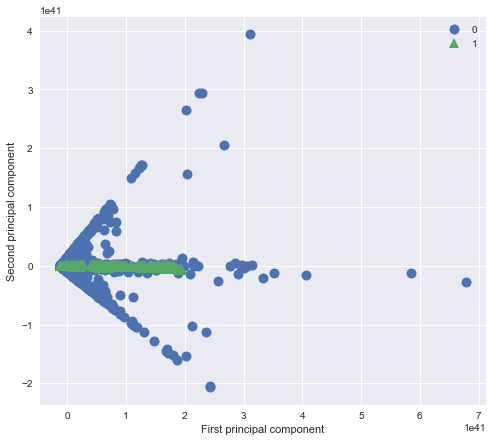

In [35]:
import mglearn
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_smt_pca[:, 0], X_smt_pca[:, 1], y_smt)
plt.legend(['0','1'], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Model-based Feature Selection

In [36]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

In [37]:
X_smt_ = pd.DataFrame(X_smt)
X_smt = X_smt_.fillna(X_smt_.mean())
#X_smt.isna()

In [143]:
#print(np.isfinite(X_smt).all())

不存在无穷数字

In [142]:
#print(np.isnan(X_smt).any())



# 4. Automatic Feature Selection
 
 ### Univariate statistics


In [38]:
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split




X_train, X_test, y_train, y_test = train_test_split(
    X_smt, y_smt, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (4449, 770)
X_train_selected.shape: (4449, 385)


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 31  32  33  35  36 669 691 692 693 727 755] are constant.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


([], <a list of 0 Text yticklabel objects>)

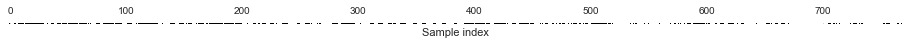

In [26]:
mask = select.get_support()
#print(mask)
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

# 5. build my model 

### 5.1 logistic

In [39]:
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression()
log_reg.fit(X_train_selected, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
y_pred = log_reg.predict(X_test_selected)

Confusion matrix:
 [[2211   49]
 [2223    1]]


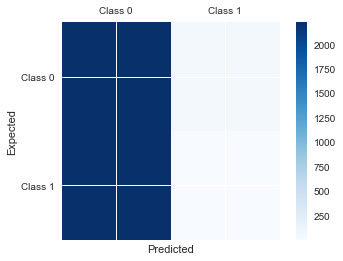

In [31]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [32]:
# evaluate the model on the test set
print("Test set score: {:.2f}".format(log_reg.score(X_test_selected, y_test)))

Test set score: 0.49


In [45]:
#使用5折交叉验证
from sklearn.model_selection import cross_val_score


scores = cross_val_score(log_reg, X_, y_, cv=5)
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.50


In [61]:
#使用标准化后的数据
scores = cross_val_score(log_reg, X_scaled, y_, cv=5)
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.84


### 5.2 XGBCclassifier

In [47]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score



model = XGBClassifier()
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.39%


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [34]:
model = XGBClassifier()
eval_set = [(X_test_selected, y_test)]
model.fit(X_train_selected, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.657407
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.62657
[2]	validation_0-logloss:0.594427
[3]	validation_0-logloss:0.569337
[4]	validation_0-logloss:0.541622
[5]	validation_0-logloss:0.520868
[6]	validation_0-logloss:0.496776
[7]	validation_0-logloss:0.479109
[8]	validation_0-logloss:0.462414
[9]	validation_0-logloss:0.446696
[10]	validation_0-logloss:0.432528
[11]	validation_0-logloss:0.420276
[12]	validation_0-logloss:0.404299
[13]	validation_0-logloss:0.391128
[14]	validation_0-logloss:0.375724
[15]	validation_0-logloss:0.366398
[16]	validation_0-logloss:0.355174
[17]	validation_0-logloss:0.344351
[18]	validation_0-logloss:0.337048
[19]	validation_0-logloss:0.328969
[20]	validation_0-logloss:0.318666
[21]	validation_0-logloss:0.310876
[22]	validation_0-logloss:0.302143
[23]	validation_0-logloss:0.296084
[24]	validation_0-logloss:0.290409
[25]	validation_0-logloss:0.28461
[26]	validation_0-logloss:0.278271

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [42]:
#合并数据进行模型拟合，并输出重要特征
X_ = pd.concat((pd.DataFrame(X_train_selected),pd.DataFrame(X_test_selected)))
print(X_.shape)
y_ = pd.concat((y_train,y_test))
print(y_.shape)

(8898, 385)
(8898,)


In [36]:
from xgboost import plot_importance
from matplotlib import pyplot

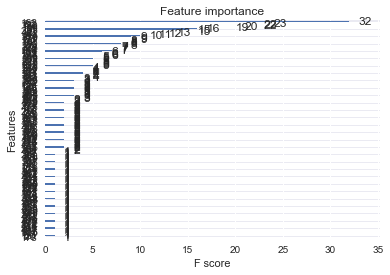

In [37]:
model.fit(X_, y_)

plot_importance(model)
pyplot.show()

In [79]:
#网格调参
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold



model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_, y_)

In [80]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.049147 using {'learning_rate': 0.3}


In [81]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-0.689373 (0.000109) with: {'learning_rate': 0.0001}
-0.658011 (0.000741) with: {'learning_rate': 0.001}
-0.454565 (0.005581) with: {'learning_rate': 0.01}
-0.108235 (0.006705) with: {'learning_rate': 0.1}
-0.062576 (0.006852) with: {'learning_rate': 0.2}
-0.049147 (0.008084) with: {'learning_rate': 0.3}


In [48]:
scores = cross_val_score(model, X_, y_, cv=5)
print("Average cross-validation score: {:.2f}".format(scores.mean()))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

Average cross-validation score: 0.98


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## 5.3 Rondom forest

In [49]:
from sklearn.ensemble import RandomForestClassifier



forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train_selected, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train_selected, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test_selected, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.985


In [50]:
#5折交叉验证
scores = cross_val_score(forest, X_, y_, cv=5)
print("Average cross-validation score: {:.2f}".format(scores.mean()))


Average cross-validation score: 0.99


# 5.4 svm

In [93]:
from sklearn.svm import SVC


svc = SVC()
svc.fit(X_train_selected, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_selected, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_selected, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.50


In [51]:
#对数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_)
X_scaled = scaler.transform(X_)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_, random_state=0, test_size=.5)

from sklearn.svm import SVC


svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.98
Accuracy on test set: 0.97


In [56]:
#5折交叉验证
scores = cross_val_score(svc, X_scaled, y_, cv=5)
print("Average cross-validation score: {:.2f}".format(scores.mean()))



Average cross-validation score: 0.98


# 5.5 mlpc

In [57]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.97


In [58]:
#5折交叉验证
scores = cross_val_score(mlp, X_scaled, y_, cv=5)
print("Average cross-validation score: {:.2f}".format(scores.mean()))


Average cross-validation score: 0.98


# 5.6 navie bayes

In [59]:
from sklearn.naive_bayes import GaussianNB



gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(gnb.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(gnb.score(X_test, y_test)))

Accuracy on training set: 0.78
Accuracy on test set: 0.79


In [60]:
#5折交叉验证
scores = cross_val_score(gnb, X_scaled, y_, cv=5)
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.78


# 5.7 Grid-search with cross-validation

### with standary data

In [62]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)

In [64]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [65]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 1.00


In [66]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.01}
Best cross-validation score: 1.00


In [67]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


### Analyzing the result of cross-validation

In [68]:
import pandas as pd
# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,6.069189,1.337572,0.505057,0.505057,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",22,0.505051,0.505059,...,0.505062,0.505056,0.505062,0.505056,0.505062,0.505056,0.524056,0.129052,0.000006,0.000001
1,5.662216,1.232508,0.505057,0.505057,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",22,0.505051,0.505059,...,0.505062,0.505056,0.505062,0.505056,0.505062,0.505056,0.071431,0.006123,0.000006,0.000001
2,5.550472,1.215401,0.505057,0.505057,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",22,0.505051,0.505059,...,0.505062,0.505056,0.505062,0.505056,0.505062,0.505056,0.020507,0.024957,0.000006,0.000001
3,5.859023,1.294965,0.505057,0.505057,0.001,1,"{'C': 0.001, 'gamma': 1}",22,0.505051,0.505059,...,0.505062,0.505056,0.505062,0.505056,0.505062,0.505056,0.261217,0.029706,0.000006,0.000001
4,5.349802,1.201660,0.505057,0.505057,0.001,10,"{'C': 0.001, 'gamma': 10}",22,0.505051,0.505059,...,0.505062,0.505056,0.505062,0.505056,0.505062,0.505056,0.168826,0.017344,0.000006,0.000001


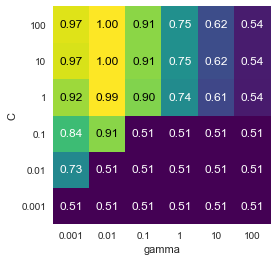

In [69]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

# 6 总结

In [74]:
pd.Series([0.78,0.84,0.98,0.99,0.98,0.98,1],index=['navie bayes','log_reg','XGBC','Rondom forset','svm','mlpc','grid_search.cv'])

navie bayes       0.78
log_reg           0.84
XGBC              0.98
Rondom forset     0.99
svm               0.98
mlpc              0.98
grid_search.cv    1.00
dtype: float64

###  使用逻辑斯蒂分类和朴素贝叶斯分类时得到测试集上准确率在50%左右，因此采用StandardScaler()标准化后再进行分类，其余方法都是基于标准化的数据。

不存在空值

‘’‘

基于模型的特征选择

’‘’

方法二


In [161]:
scaler = StandardScaler()
scaler.fit(X_smt)
X_smt.scaled = scaler.transform(X_smt)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(
    X_smt.scaled, y_smt, random_state=0, test_size=.5)

In [163]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

In [164]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (4465, 769)
X_train_l1.shape: (4465, 385)


([], <a list of 0 Text yticklabel objects>)

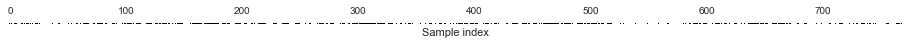

In [168]:
mask = select.get_support()
#print(mask)
#visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

'''

Iterative feature selection

'''

方法三

([], <a list of 0 Text yticklabel objects>)

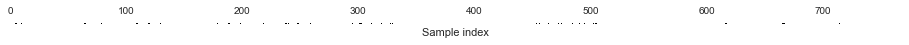

In [169]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)


# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [170]:
X_train_l3 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l3.shape))

X_train.shape: (4465, 769)
X_train_l1.shape: (4465, 40)


‘’‘

最终选择第一种特征选择方式对模型进行特征选择

‘’‘



‘’‘


模型建立



‘’‘’




from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_data, target, random_state=0)

#特征选择
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())